# Regularization - part I

In the theory class on supervised learning you have seen the role of regularisation in regression and classification problems and some common types of regularisation techniques, like $L_1$ and $L_2$ regularisation. We explained that linear least squares regression with $L_2$ regularization is known as Ridge regression or Tikhonov regularization, and linear least squares regression with $L_1$ regularisation is known as the LASSO regression. Here you experiment with these regularisation approaches together with a combined $L_1-L_2$ regularisation (Elastic net regression).

The following examples illustrate the standard regularizations that accompany regression models. In other library functions, one should pay attention to the existence of the `penalty` parameter, which enables the setting of some regularization technique.

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets 
from sklearn import preprocessing

In [39]:
np.random.seed(7)

In the sequel, we will use a set of data to predict real estate prices.

In [40]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [41]:
X = data.data
y = data.target

This set has 8 attributes.

In [42]:
np.info(X)

class:  ndarray
shape:  (20640, 8)
strides:  (8, 165120)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x558820ade3e0
byteorder:  little
byteswap:  False
type: float64


In [43]:
np.info(y)

class:  ndarray
shape:  (20640,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x5588208a3fb0
byteorder:  little
byteswap:  False
type: float64


In [44]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [45]:
number_of_features = len(data.feature_names)
number_of_features

8

We will divide the data into a training set and a test set and standardize the obtained value sets.

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state = 42)

In [47]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1. Linear regression

We will use the simple linear regression model as the base model.

In [48]:
linear = linear_model.LinearRegression()

In [49]:
linear.fit(X_train, y_train)

LinearRegression()

Model coefficients can be obtained via the `coef_` property.

In [50]:
linear.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

We will monitor the performance of the model at the training set and the test set. We will use the coefficient of determination as a metric.

In [51]:
linear_train_score = linear.score(X_train, y_train) 

In [52]:
linear_test_score = linear.score(X_test, y_test) 

In [53]:
print('Training: ', linear_train_score, '\nTesting: ', linear_test_score)

Training:  0.609370412027382 
Testing:  0.5970494128783952


### 2. Ridge regression (Tikhonov regularization)

Recall from the theory class that  linear regression with the square loss function and $L_2$ regularisation is called Ridge regression or Tikhonov regularisation. We explained that in this case the weights $w_i$ are determined by minimising the following cost function: $$\|y-Xw\|^2_2+\lambda\|w\|^2_2.$$ The $\lambda$ parameter is a metaparameter that affects the strength of regularization. For large values of the $\lambda$ parameter, models with small coefficients are favored. The coefficients obtained in this way can be small and close to zero, but they are almost never exactly zero because the sum of the coefficients is minimized, not the individual values.

Working with linear regression models with $L_2$ regularization is supported by the `scikit-learn` library via the` Ridge` class. The `alpha` parameter plays the role of the regularization hyperparameter $\lambda $. Its values must be positive numbers.

In [54]:
ridge = linear_model.Ridge(alpha = 10)

In [55]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [56]:
ridge.coef_

array([ 8.45893595e-01,  1.21261558e-01, -2.96246901e-01,  3.44080921e-01,
        2.22854617e-04, -4.17714407e-02, -8.85515102e-01, -8.61370105e-01])

In [57]:
ridge_train_score = ridge.score(X_train, y_train) 

In [58]:
ridge_test_score = ridge.score(X_test, y_test) 

In [59]:
print('Training: ', ridge_train_score, '\nTesting: ', ridge_test_score)

Training:  0.6093606347359881 
Testing:  0.5972113939790409


### 3. Lasso regression (linear regression with $L_1$ regularization)

In contrast to the Tikhonov regularisation, LASSO (Least Absolute Shrinkage and Selection Operator) regularization adds the term $\|w\|_1= \lambda\sum\limits_{i = 1}^{N}{|w_{i}|}$ to the squared error term of the regression model. The $\lambda$ parameter is a metaparameter that affects the strength of regularization. Unlike ridge regression, such models can result in coefficients that are exactly equal to zero.

Working with linear regression models with lasso regularization is supported by the `scikit-learn` library via the` Lasso` class. The `alpha` parameter plays the role of the regularization hyperparameter $\lambda $. Its value must be a positive number.

In [60]:
lasso = linear_model.Lasso(alpha=0.1)

In [61]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [62]:
lasso.coef_

array([ 0.70574123,  0.10463239, -0.        ,  0.        , -0.        ,
       -0.        , -0.00892742, -0.        ])

In [63]:
lasso_train_score = lasso.score(X_train, y_train) 

In [64]:
lasso_test_score = lasso.score(X_test, y_test) 

In [65]:
print('Training: ', lasso_train_score, '\nTesting: ', lasso_test_score)

Training:  0.49331851090430956 
Testing:  0.4922128390091496


### 4. ElasticNet regression (linear regression with $L_1$ and $L_2$ regularization)

`ElasticNet` is a type of regularization that combines `L_1` and `L_2` regularization. The regularization expression added to the model is of the form $a\cdot L_1 + b \cdot L_2$. For $a=0$ the expression corresponds to ridge regularization, while for $b=0$ the expression corresponds to lasso regularization. This type of regularization is supported by the `ElasticNet` function at the` scikit-learn` library level. The parameters `alpha` and` l1_ratio` are expected from the parameters, for which $\alpha=a+b $ and $L_1\_ratio = \frac{a}{a+b}$ apply. Due to the strict restriction on the coefficients, this regularization usually gives slightly worse results in practice, but has its applications in specific domains.

In [66]:
elastic = linear_model.ElasticNet(alpha = 0.75 , l1_ratio = 0.5 )

In [67]:
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.75)

In [68]:
elastic.coef_

array([ 0.30485183,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

In [69]:
elastic_train_score = elastic.score(X_train, y_train) 

In [70]:
elastic_test_score = elastic.score(X_test, y_test) 

In [71]:
print('Training: ', elastic_train_score, '\nTesting: ', elastic_test_score)

Training:  0.29396457104403995 
Testing:  0.2921694141939398


### Visualization of the model coefficients

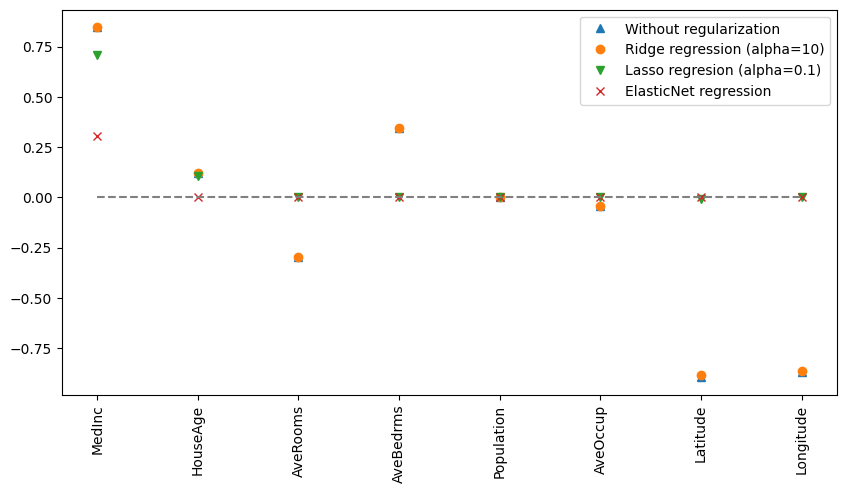

In [75]:
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, number_of_features), data.feature_names, rotation='vertical')
plt.plot(linear.coef_, '^', label='Without regularization' )
plt.plot(ridge.coef_, 'o', label='Ridge regression (alpha=10)')
plt.plot(lasso.coef_, 'v', label='Lasso regresion (alpha=0.1)')
plt.plot(elastic.coef_, 'x', label='ElasticNet regression')
plt.plot(np.arange(0, number_of_features), np.zeros(number_of_features), color='gray', linestyle='--')
plt.legend(loc='best')
plt.show()

The values of hyperparameters that occur in regularized models are determined in the same way as the hyperparameters of the models observed so far.